# Problem Set 7

ECON 526

This problem set uses data from “Long-Term Impacts of Individual
Development Accounts on Homeownership among Baseline Renters: Follow-Up
Evidence from a Randomized Experiment” M. Grinstein-Weiss et al. (2013).
Data is available from S. Grinstein-Weiss Michal and Key (2013). The
data carries a Creative Commons
<a href="http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution
4.0 International
License<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"></a>.

# Question 1

Read the introduction and section I of M. Grinstein-Weiss et al. (2013).
Briefly (1-3 sentences) describe the experiment being studied.

This paper addressed the impact a IDA has on homeownership in the long run after a policy finished its treatment period. It was shown this IDA had significant incrases in homeownership rates amoungst treated during the treatment period (1998-2003) however through a series of follow up interviews denoted as waves (1-4) they show the 4th and most recent wave of interviews provides evidence this programs had small and insignificant effects in the long run (where long run is 2009 for 5 years ex-post). They compared the differences to a control comprised of indiviuals matching on a series of charactoristics (in section 2 so not entirely relevent to this question but relevent to trusting the matching). 

# Question 2

We load the data in a dataframe named `df`.

In [3]:
import pandas as pd
df=pd.read_stata("data/AEJPol-2011-0054_R1_shared_data_file.dta")

The data is not well documented, but from reading the paper and code, I
created the following data dictionary. `datadic["<col name>"]` is
supposed to be the definition of each col.

In [4]:
datadic = {
    'id_abt' : "identifier",
    'id_rti' : "",
    'id_part': "",
    'treat' : "treatment indicator",
    'cohort': "experiment recruitment cohort",
    'sample12': "responded to wave 1 & 2 surveys",
    'sample13': "responded to wave 1 & 3 surveys",
    'sample14': "responded to wave 1 & 4 surveys",
    'sample134' : "responded to wave 1, 3, & 4 surveys",
    'dt_inter_u17' : "wave 1 interview date",
    'dt_inter_u25' : "wave 2 interview date",
    'dt_inter_u33' : "wave 3 interview date",
    'dt_inter_u42' : "wave 4 interview date",
    'female_u17' : "female",
    'race_u17' : "race",
    'race_cau_u17': "whether Caucasian",
    'age_u17' : "age",
    'hh_total_u17' : "number in household",
    'hh_adult_u17' : "number of other adults in household",
    'hh_child_u17' : "number of children",
    'marital_u17' : "marital status",
    'ed_u17' : "education",
    'sat_heal_u17' : "health satisfication",
    'sat_fin2_u17' : "financial satisfication",
    'ins_heal_u17' : "health insurance",
    'src_welf_u17' : "received welfare payments",
    'inc_tot_u17' : "monthly income",
    'own_home_u17': "own home in wave 1",
    'own_home_u25': "own home in wave 2",
    'own_home_u33': "own home in wave 3",
    'own_home_u42': "own home in wave 4",
    'hm_own4_u42': "",
    'hm_byyr1_u42': "Year bought home 1 in wave 4",
    'hm_byyr2_u42' :"Year bought home 2 in wave 4",
    'hm_byyr3_u42': "Year bought home 3 in wave 4",
    'hm_byow1_u42': "Had home 1 in wave 4",
    'hm_byow2_u42': "Had home 2 in wave 4",
    'hm_byow3_u42': "Had home 3 in wave 4",
    'hm_forc1_u42': "Home 1 foreclosed",
    'hm_forc2_u42': "Home 2 foreclosed",
    'hm_lvyr1_u42': "Year left home 1 in wave 4",
    'hm_lvyr2_u42': "Year left home 2 in wave 4",
    'hm_lvyr3_u42': "Year left home 3 in wave 4",
    'ass_home_u42': "", 'owe_home_u42': "", 'mt_year1_u42': "", 'mt_debt1_u42': "", 'lib_home_u42': "",
    'mt_pymt1_u42': "", 'mt_fix1_u42': "", 'mt_int1_u42': "", 'mt_30_u42': "", 'mt_90_u42': "",
    'pub_home_u17': "public housing in wave 1",
    'section8_u17': "section 8 rental assistance in wave 1",
    'own_car_u17': "owned car in wave 1",
    'own_prop_u17': "own other property",
    'own_bus_u17': "owned business in wave 1",
    'own_ira_u17': "own IRA in wave 1",
    'own_bank_u17': "have a bank account in wave 1",
    'ass_tot_u17': "assets in wave 1",
    'lib_tot_u17': "", 'cap_soc_u25': "", 'cap_soc_u33': "", 'cap_work_u25': "",
    'cap_work_u33': "", 'cap_med_u25': "", 'cap_med_u33': "", 'cap_kid_u25': "",
    'cap_kid_u33': "", 'cap_ceo_u25': "", 'cap_ceo_u33': "", 'cap_home_u25': "",
    'cap_home_u33': "", 'cap_ed_u25': "", 'cap_ed_u33': "", 'cap_tax_u25': "",
    'cap_tax_u33': "", 'mis_plan_u42': "", 'mis_g_u42': "", 'gt_scale_u17': "", 'miss_gt': "",
    'gv_scale_u17': "", 'miss_gv': "", 'own_scale_u17': "", 'miss_own': "", 'ci_scale_u17': "",
    'miss_ci': "", 'str_scale_u17': "", 'miss_str': "", 'inv_treat': "", 'crossover_23': "",
    'crossover_234': "", 'mis_match_u42': ""
}

Report unadjusted estimates of the average treatment effect of the
program after waves 2, 3, and 4.

Just to note here I droppped the columns which didnt have observations by the specific ATE I was running based on if people responded. I am not sure how they was supposed to be handled for example you might drop everything intitally before the loop or drop cummulatively as you go or just drop the minimum as I did.

In [8]:
import statsmodels.formula.api as smf
# your code here
# look at the mean by treatment status of df.own_home_u25 and similar variables
# use smf.ols() to get standard errors
#x = smf.ols('own_home_u25 ~ treat', data=df).fit()

cols = ['own_home_u25', 'own_home_u33', 'own_home_u42']
df['treat'] = df['treat'].replace({'Control': 0, 'Treatment': 1}).astype(int)

# Loop through the cols and perform linear regression
for i, col in enumerate(cols):
    df_d = df.copy()
    df_d = df_d.dropna(subset=[col])
    df_d[col] = df_d[col].replace({'no': 0, 'yes': 1}).astype(int)
    model = smf.ols(f'{col} ~ treat', data=df_d).fit()

    # Print the results for each col
    print(f"Wave number {i+2}")
    print(f"Coefficient (ATE): {model.params['treat']:.3f} SE: {model.bse['treat']:.3f}")


Wave number 2
Coefficient (ATE): -0.016 SE: 0.027
Wave number 3
Coefficient (ATE): 0.067 SE: 0.037
Wave number 4
Coefficient (ATE): 0.027 SE: 0.039


# Question 3

Treatment was assigned randomly in wave 1, but not everyone responded to
later surveys.

## Q3.1

Report the difference in average monthly income at wave 1 between the
treatment and control group for everyone in the data, everyone
responding to waves 1 and 2, everyone responding to waves 1 and 3, and
everyone responding to waves 1 and 4. Also include standard errors for
the differences.

*Hint: Monthly income is `inc_tot_u17`. Being in waves 1 and X is
`sample1X`.*

In [9]:
#need to reimport it as we got rid of the nans in the question before I changed the code
#so I its a different dataframe but still just to be safe
df=pd.read_stata("data/AEJPol-2011-0054_R1_shared_data_file.dta")
df['treat'] = df['treat'].replace({'Control': 0, 'Treatment': 1}).astype(int)

wave_cols = ['all','sample12', 'sample13', 'sample14']

for n, wave_col in enumerate(wave_cols):
    # Convert wave_col to binary if it's not already
    if wave_col == 'all':
        df_wave = df
    else:
        df[wave_col] = df[wave_col].replace({'no': 0, 'yes': 1}).astype(int)
        # Subset data for respondents in both wave 1 and the current wave
        df_wave = df[df[wave_col] == 1]

    model = smf.ols('inc_tot_u17 ~ treat', data=df_wave).fit()

    print(f"For respondents in Wave 1 and Wave {n+1}")
    print(f"Mean Income Difference: {model.params['treat']:.3f}, SE: {model.bse['treat']:.3f}")



For respondents in Wave 1 and Wave 1
Mean Income Difference: 108.608, SE: 50.065
For respondents in Wave 1 and Wave 2
Mean Income Difference: 121.393, SE: 53.870
For respondents in Wave 1 and Wave 3
Mean Income Difference: 123.745, SE: 56.372
For respondents in Wave 1 and Wave 4
Mean Income Difference: 122.679, SE: 56.151


## Q3.2

Why might treatment be related potential outcomes conditional a
responding to a later survey?

I'm a bit confused in the wording of this question but I'll answer what I think its asking. As we saw above the mean income difference is increasing in respondents this means that the control will consist of more lower income people how are probably all else equal less likely to buy a house than the person that initially started with a higher mean income regardless of treatment. This selection bias could arise for a multitude of reasons but perhaps the program helping higher low income people more than lower low income people which gained more responses from them since we are more likely to take time out of our day to respond to a program survey if we benifited from it. Because of this selection bias when making inferences on future waves we must be careful since we cannot claim that the control and treatment are independent, they could have unlying charactoristics such as this mean income difference that have diverged. 

# Question 4

## Q4.1

Use a flexible model to estimate the propensity score. Include only
pretreatment variables (i.e. variables recorded in wave 1) when
estimating the propensity score.

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
#only using Gradient Boosting only and not Logistric regression as more 'flexible'

#need to convert everything to numbers so we can actually calculate a propensity 
#score on all the wave one variables which I am assuming are the ones ending in u17
#additionallly I dropped the time of the interview column as that is not a relevant wave 1 variable

for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].astype('category').cat.codes
wave1_columns = [col for col in df.columns if col.endswith('u17') and col != 'dt_inter_u17']
wave1_columns.append('treat')
df_cov = df[wave1_columns].dropna()
T = df_cov['treat']
X_pre = df_cov.drop('treat', axis=1)

#train and predict the propensity scores

propensity_model = GradientBoostingClassifier()
propensity_model.fit(X_pre, T)
propensity_scores = propensity_model.predict_proba(X_pre)[:, 1]

## Q4.2

Check for overlap by plotting histograms of estimated propensity scores
conditional on treatment status.


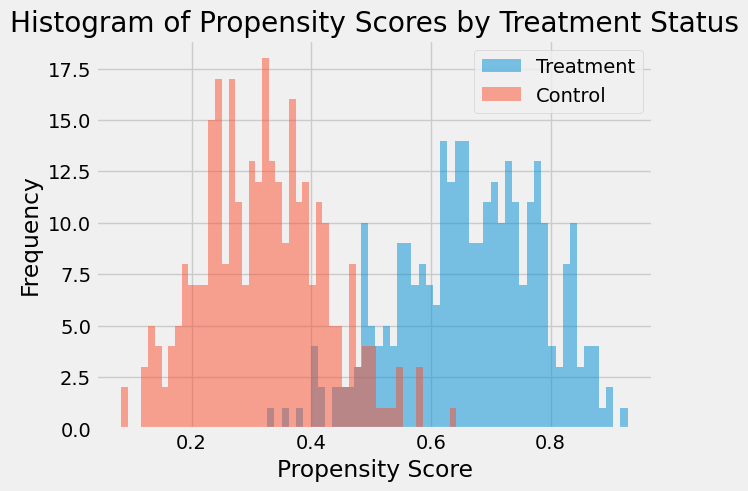

In [11]:
from matplotlib import style
from matplotlib import pyplot as plt
style.use("fivethirtyeight") # or whatever you prefer

scores_treatment = propensity_scores[T == 1]
scores_control = propensity_scores[T == 0]

# Plotting
plt.hist(scores_treatment, bins=50, alpha=0.5, label='Treatment')
plt.hist(scores_control, bins=50, alpha=0.5, label='Control')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Propensity Scores by Treatment Status')
plt.legend()
plt.show()

# Question 5

## Q5.1

Compute a doubly robust estimates of the effect of the treatment on home
ownership at waves 2-4 (3 separate estimates). Report estimates and
confidence intervals.

In [14]:
#econml was so annoying to import it would refuse to import in some environments, only in base conda
#and my system wide python but not in my 526 virtual conda environment.....this took forever to troubleshoot :(
from econml.dr import LinearDRLearner
import warnings
warnings.filterwarnings('ignore') # its making it hard to see results with warnings cluttering output
# a bunch of warnings related to this NumbaDeprecationWarning
df=pd.read_stata("data/AEJPol-2011-0054_R1_shared_data_file.dta") #again just to make sure no issues
df['treat'] = df['treat'].replace({'Control': 0, 'Treatment': 1}).astype(int)

waves = ['own_home_u25','own_home_u33','own_home_u42']
results = {}
# doesnt really change anything dropping all of them or just wave by wave
# trying to get it closer to the paper but its not getting there  
# df.dropna(subset=waves, inplace=True)

for wave in waves:
    # Initialize LinearDRLearner
    estimator = LinearDRLearner()
    df_wave = df.dropna(subset=[wave]) #need to drpo NANs to have package work though 

    for col in df_wave.select_dtypes(include=['category']).columns: #convert to way that package recognizes
        df_wave[col] = df_wave[col].astype('category').cat.codes
    wave1_columns = [col for col in df_wave.columns if col.endswith('u17') and col != 'dt_inter_u17']
    wave1_columns.append('treat')
    wave1_columns.append(wave) #our actual homeownership that isnt in the first round of variables

    df_cov = df_wave[wave1_columns].dropna()
    T = df_cov['treat']
    X = df_cov.drop(['treat', wave], axis=1)
    Y = df_cov[wave]



    est = LinearDRLearner(model_regression=LassoCV(),
                    model_propensity=LogisticRegressionCV(),
                    cv=5)

    est.fit(Y, T, X=None, W=X)
    point = est.const_marginal_effect(None)
    lb, ub = est.const_marginal_effect_interval(None, alpha=0.05)
    results[wave] = {'point_estimate': point, 'lb': lb, 'ub': ub}
    print(f'The confidence interval for home ownership for {wave} is {lb, ub} with the point estimate being {point}')


The confidence interval for home ownership for own_home_u25 is (array([[-0.08053954]]), array([[0.04341135]])) with the point estimate being [[-0.01856409]]
The confidence interval for home ownership for own_home_u33 is (array([[-0.04118742]]), array([[0.13335585]])) with the point estimate being [[0.04608422]]
The confidence interval for home ownership for own_home_u42 is (array([[-0.10467951]]), array([[0.08099251]])) with the point estimate being [[-0.0118435]]


## Q5.2

Create a plot of your estimated treatment effects by wave with
confidence intervals.

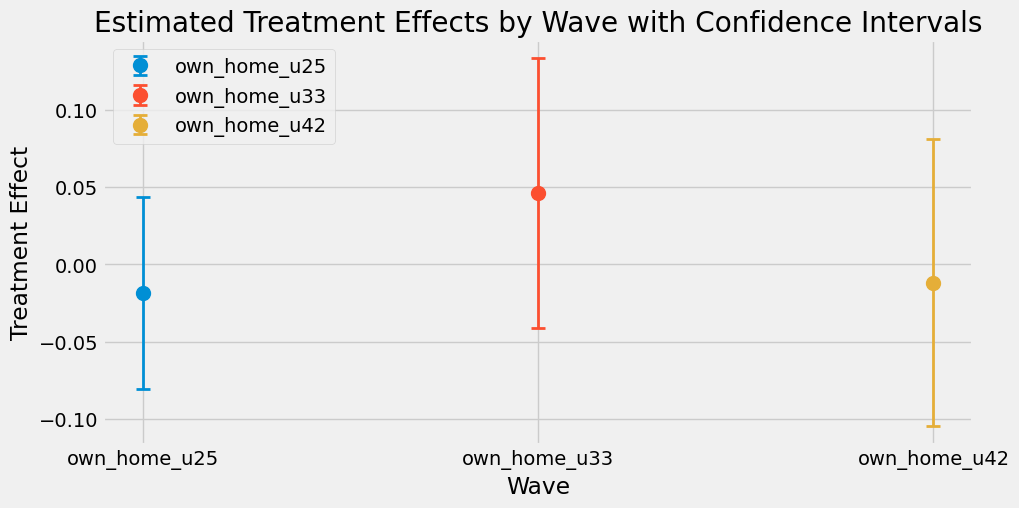

In [15]:
# Plotting the results
plt.figure(figsize=(10, 5))

# Iterate through the results and plot
for wave, data in results.items():
    # Ensure the values are scalars
    point_estimate = data['point_estimate'].item()
    lb = data['lb'].item()
    ub = data['ub'].item()

    # Calculate errors for lower and upper bounds
    error = [[point_estimate - lb], [ub - point_estimate]]

    # Plotting each point with error bars
    plt.errorbar(x=wave, y=point_estimate, yerr=error, fmt='o', markersize=10, capsize=5, capthick=2, elinewidth=2, label=f'{wave}')

plt.xlabel('Wave')
plt.ylabel('Treatment Effect')
plt.title('Estimated Treatment Effects by Wave with Confidence Intervals')
plt.xticks(ticks=range(len(waves)), labels=waves)  # Set x-ticks to wave names
plt.legend()
plt.grid(True)
plt.show()


## Q5.3

Compare your estimates to those in table 4 and figure 1 of M.
Grinstein-Weiss et al. (2013).

First its only for wave 4 and provides slightly positive results. These results are slightly different than the paper, although they lead to the same conclusion that these long term effects are insigficant. These differences could be from simple things such as including slightly different variables in the paper (i..e those that didnt simply end in a 17) or not dropping nans in the manner I did. 

It might be to a more complicated issue regarding packages and statistical techniques used. I am not sure they used a doubly robust package as the reported estimates are Difference-in-differences, OLS (Regression-adjusted difference-in-differences), Propensity score weighted, Propensity score matched sample.So potentially the different results are purely down to not using the same inference methods. 

# References

Grinstein-Weiss, Michal, Michael Sherraden, William G. Gale, William M.
Rohe, Mark Schreiner, and Clinton Key. 2013. “Long-Term Impacts of
Individual Development Accounts on Homeownership Among Baseline Renters:
Follow-up Evidence from a Randomized Experiment.” *American Economic
Journal: Economic Policy* 5 (1): 122–45.
<https://doi.org/10.1257/pol.5.1.122>.

Grinstein-Weiss, Sherraden, Michal, and Clinton Key. 2013. “Replication
Data for: Long-Term Impacts of Individual Development Accounts on
Homeownership Among Baseline Renters: Follow-up Evidence from a
Randomized Experiment.” American Economic Association.
<https://doi.org/10.3886/E116540V1>.